In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df=pd.read_csv('01.csv')
df.head()

,time,AT,BG,BP,BS,BX,DO,DOPer,HU,NJD,...,WSE,WSM,WT,YBG,YLS,YZQ,ZBG,ZD,ZQ,ZZQ
0,202301010000,1.0,0.8,1030.3,NaN,50,/,0.0,42,/,...,10.2,8.9,3.7,1.3,58.1,4.9,2.0,957.1,4.9,5.0
1,202301010100,0.6,0.8,1030.7,NaN,48,/,0.0,44,/,...,8.9,7.5,3.7,1.2,57.1,4.9,2.2,966.3,4.6,4.5
2,202301010200,0.6,0.7,1030.9,NaN,71,/,0.0,47,/,...,7.1,6.0,3.8,1.1,56.5,4.6,1.5,953.7,4.6,4.0
3,202301010300,0.4,0.6,1030.9,NaN,62,/,0.0,40,/,...,6.4,5.5,3.9,0.8,56.0,4.3,1.3,982.4,4.4,4.0
4,202301010400,0.4,0.5,1031.2,NaN,85,/,0.0,44,/,...,6.5,5.0,3.9,0.8,56.8,4.2,1.2,1000.1,4.2,4.0


In [ ]:
#数据标准化

In [11]:
df=pd.read_csv('01.csv')
df.head()

df['time'] = pd.to_datetime(df['time'],format='%Y%m%d%H%M')
print(df['time'].head(3),df['YBG'].head(3))
# df_head100 = df.head(200)
df_head100=df

#df_train_x = df_head100[['WS','WD','WSM','AT','BP']]
#df_train_y = df_head100['YBG']
#print(df_head100)
#print(df_train_y[df_train_y == '/'])
df_head100['YBG'] = df_head100['YBG'].replace('/', np.nan)
df_head100['WS']= df_head100['WS'].replace('/', np.nan)
df_head100['WD']= df_head100['WD'].replace('/', np.nan)
df_head100['WSM']= df_head100['WSM'].replace('/', np.nan)
df_head100['AT']= df_head100['AT'].replace('/', np.nan)

df_data = df_head100[['WS','YBG']]
df_data = df_data.dropna(subset=['YBG', 'WS'])
df_data['YBG']=df_data['YBG'].astype('float')
print(df_data.head())
type(df_data['YBG'][0])

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
Name: time, dtype: datetime64[ns] 0    1.3
1    1.2
2    1.1
Name: YBG, dtype: object
    WS  YBG
0  6.8  1.3
1  5.7  1.2
2  4.6  1.1
3  4.9  0.8
4  4.4  0.8


numpy.float64

#增加input为5个参数

In [7]:
df=pd.read_csv('01.csv')
df.head()

df['time'] = pd.to_datetime(df['time'],format='%Y%m%d%H%M')
print(df['time'].head(3),df['YBG'].head(3))
# df_head100 = df.head(200)
df_head100=df

#df_train_x = df_head100[['WS','WD','WSM','AT','BP']]
#df_train_y = df_head100['YBG']
#print(df_head100)
#print(df_train_y[df_train_y == '/'])
df_head100['YBG'] = df_head100['YBG'].replace('/', np.nan)
df_head100['WS']= df_head100['WS'].replace('/', np.nan)
df_head100['WD']= df_head100['WD'].replace('/', np.nan)
df_head100['WSM']= df_head100['WSM'].replace('/', np.nan)
df_head100['AT']= df_head100['AT'].replace('/', np.nan)
df_head100['BP']= df_head100['BP'].replace('/', np.nan)

df_data = df_head100[['WS','WD','WSM','AT','BP','YBG']]
df_data = df_data.dropna(subset=['WS','WD','WSM','AT','BP','YBG'])
df_data['YBG']=df_data['YBG'].astype('float')
print(df_data.head())
type(df_data['YBG'][0])

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
Name: time, dtype: datetime64[ns] 0    1.3
1    1.2
2    1.1
Name: YBG, dtype: object
    WS   WD  WSM   AT      BP  YBG
0  6.8   84  8.9  1.0  1030.3  1.3
1  5.7  100  7.5  0.6  1030.7  1.2
2  4.6   87  6.0  0.6  1030.9  1.1
3  4.9   92  5.5  0.4  1030.9  0.8
4  4.4   81  5.0  0.4  1031.2  0.8


numpy.float64

# 构建神经网络模型

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 输入层，包含4个神经元（对应4个输入特征），使用relu激活函数
model.add(Dense(10, input_dim=1, activation='relu'))
# 隐藏层，包含5个神经元，使用relu激活函数
model.add(Dense(5, activation='relu'))
# 输出层，包含1个神经元，输出预测的数值
model.add(Dense(1))

# 编译模型，使用均方误差损失函数和adam优化器
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

#df_train_x = df_data[['WS','WD','WSM','AT','BP']]
df_train_x = df_data['WS']
df_train_y = df_data['YBG']

x = df_train_x
y = df_train_y
# 训练模型，进行100个epoch的训练
model.fit(x, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
78/78 [==============================] - 2s 3ms/step - loss: 0.7129 - mse: 0.7129
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1947 - mse: 0.1947
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1974 - mse: 0.1974
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1936 - mse: 0.1936
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1902 - mse: 0.1902
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1917 - mse: 0.1917
Epoch 7/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1889 - mse: 0.1889
Epoch 8/100
78/78 [==============================] - 0s 5ms/step - loss: 0.1920 - mse: 0.1920
Epoch 9/100
78/78 [==============================] - 0s 4ms/step - loss: 0.1892 - mse: 0.1892
Epoch 10/100
78/78 [==============================] - 0s 4ms/step - loss: 0.1863 - mse: 0.1863
Epoch 11/100
78/78 [==============================] - 0s 4m

#画出曲线

25/25 [==============================] - 0s 4ms/step


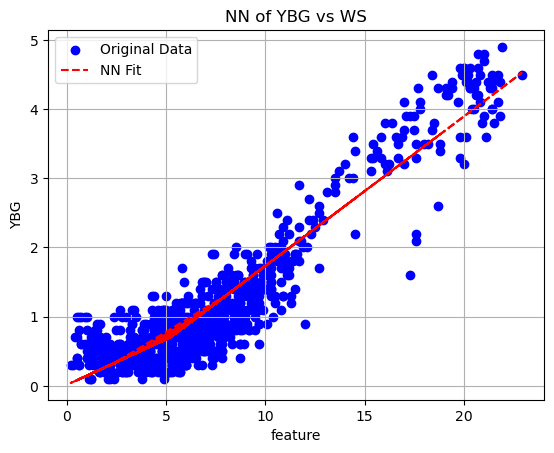

In [16]:
# 进行预测
y_pred = model.predict(x)

# 绘制原始数据点
plt.scatter(x, y, color='blue', label='Original Data')

# 绘制拟合曲线
plt.plot(x, y_pred, color='red', linestyle='--', label='NN Fit')

# 添加标题和标签
plt.title('NN of YBG vs WS')
plt.xlabel('feature')
plt.ylabel('YBG')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()